In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from ipywidgets import interact

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/stanford-cars-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.82G/1.82G [00:24<00:00, 81.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2


In [30]:
# 1. Сбор, подготовка данных, обобщение в меньшее кол-во классов (196 -> 9)

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1507OQkTdOD7er_yiZA0u9_XGRM3MOzo7')

df['class_name'].unique()

array(['AM General Hummer SUV 2000', 'Acura RL Sedan 2012',
       'Acura TL Sedan 2012', 'Acura TL Type-S 2008',
       'Acura TSX Sedan 2012', 'Acura Integra Type R 2001',
       'Acura ZDX Hatchback 2012',
       'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008',
       'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012',
       'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994',
       'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011',
       'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012',
       'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007',
       'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012',
       'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012',
       'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012',
       'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007',
       'BMW X

In [31]:
df

,test,class,boxy_2,boxx_2,boxy_1,boxx_1,file_name,class_name
0,False,1,717,853,7,112,000001.jpg,AM General Hummer SUV 2000
1,False,1,202,441,24,48,000002.jpg,AM General Hummer SUV 2000
2,False,1,180,277,4,7,000003.jpg,AM General Hummer SUV 2000
3,False,1,150,197,50,33,000004.jpg,AM General Hummer SUV 2000
4,False,1,58,83,8,5,000005.jpg,AM General Hummer SUV 2000
...,...,...,...,...,...,...,...,...
16180,True,196,234,375,36,38,016181.jpg,smart fortwo Convertible 2012
16181,True,196,164,235,34,29,016182.jpg,smart fortwo Convertible 2012
16182,True,196,359,587,32,25,016183.jpg,smart fortwo Convertible 2012
16183,True,196,186,208,60,56,016184.jpg,smart fortwo Convertible 2012


In [32]:
general_categories = {
    'Sedan': ['Sedan'],
    'SUV': ['SUV'],
    'Coupe': ['Coupe'],
    'Convertible': ['Convertible'],
    'Hatchback': ['Hatchback'],
    'Minivan': ['Minivan'],
    'Van': ['Van'],
    'Truck': ['Crew Cab', 'Extended Cab', 'Regular Cab'],
}

def map_to_general_category(class_name):
    for category, keywords in general_categories.items():
        if any(keyword in class_name for keyword in keywords):
            return category
    return 'Other'


df['general_class_name'] = df['class_name'].apply(map_to_general_category)


df['general_class'] = pd.factorize(df['general_class_name'])[0] + 1

#df.to_csv('downloads/stanford_cars_generalized_updated.csv', index=False)

In [33]:
print(f"Было классов: {len(df['class_name'].unique())}")
print(f"Стало классов: {len(df2['general_class_name'].unique())}")

Было классов: 196
Стало классов: 9


In [34]:
print(df[['general_class', 'general_class_name']].drop_duplicates())

      general_class general_class_name
0                 1                SUV
89                2              Sedan
239               3              Other
493               4          Hatchback
571               5        Convertible
661               6              Coupe
4215              7              Truck
5129              8                Van
6271              9            Minivan


In [35]:
df2 = df.drop(columns=['class', 'class_name', 'general_class', 'general_class_name'])

df2['file_name'] = df['file_name'].apply(lambda x: x[1:] if x.startswith('0') else x)

def renumber_test_images(file_name):
    num = int(file_name.split('.')[0])
    if 8145 <= num <= 16185:
        new_num = num - 8144
        return f"{new_num:05}.jpg"
    return f"{num:05}.jpg"

df2['file_name'] = df['file_name'].apply(renumber_test_images)

df2.insert(1, 'general_class', df['general_class'])
df2.insert(7, 'general_class_name', df['general_class_name'])

#df2.to_csv('downloads/stanford_cars_generalized_updated+.csv', index=False)

In [36]:
df2

,test,general_class,boxy_2,boxx_2,boxy_1,boxx_1,file_name,general_class_name
0,False,1,717,853,7,112,00001.jpg,SUV
1,False,1,202,441,24,48,00002.jpg,SUV
2,False,1,180,277,4,7,00003.jpg,SUV
3,False,1,150,197,50,33,00004.jpg,SUV
4,False,1,58,83,8,5,00005.jpg,SUV
...,...,...,...,...,...,...,...,...
16180,True,5,234,375,36,38,08037.jpg,Convertible
16181,True,5,164,235,34,29,08038.jpg,Convertible
16182,True,5,359,587,32,25,08039.jpg,Convertible
16183,True,5,186,208,60,56,08040.jpg,Convertible


In [37]:
#2.1 Анализ распределения классов

df2.groupby('general_class_name').agg({ 'general_class_name' : 'count'})

,general_class_name
general_class_name,
Convertible,1997
Coupe,2225
Hatchback,1103
Minivan,498
Other,1877
SUV,2855
Sedan,3787
Truck,1265
Van,578


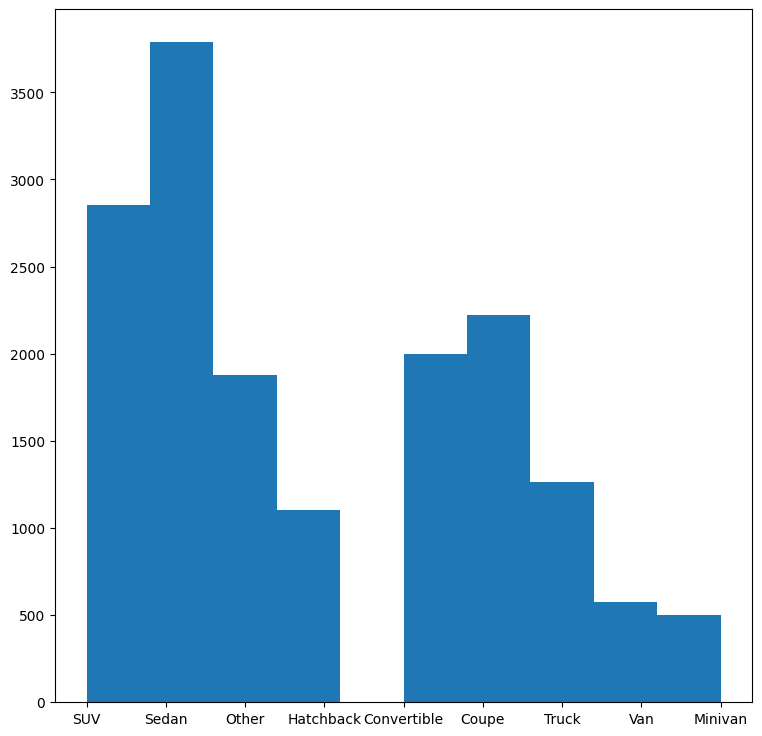

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
plt.hist(df2['general_class_name'])
plt.show()

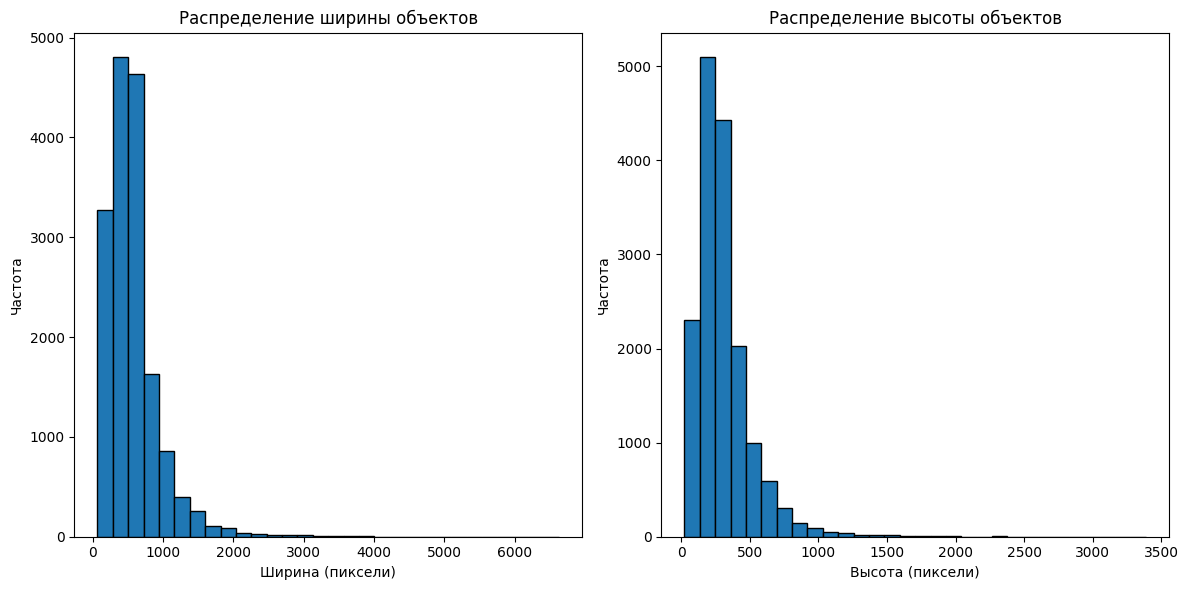

In [39]:
# 2.2 Анализ размера объектов

df2['width'] = df2['boxx_2'] - df2['boxx_1']
df2['height'] = df2['boxy_2'] - df2['boxy_1']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df2['width'], bins=30, edgecolor='black')
plt.title('Распределение ширины объектов')
plt.xlabel('Ширина (пиксели)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(df2['height'], bins=30, edgecolor='black')
plt.title('Распределение высоты объектов')
plt.xlabel('Высота (пиксели)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [47]:
# 3. Визуализация аннотаций

train_images_path = '/root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_train/cars_train'
test_images_path = '/root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_test/cars_test'

def get_image_path(filename):
    if 'train' in filename:
        return f"{train_images_path}/{filename}"
    elif 'test' in filename:
        return f"{test_images_path}/{filename}"
    else:
        return f"{train_images_path}/{filename}"


def show_image_with_annotation(idx):
    row = df2.iloc[idx]
    img_path = get_image_path(row['file_name'])

    img = Image.open(img_path)

    draw = ImageDraw.Draw(img)
    bbox = (row['boxx_1'], row['boxy_1'], row['boxx_2'], row['boxy_2'])
    draw.rectangle(bbox, outline="red", width=3)

    draw.text((row['boxx_1'], row['boxy_1'] - 10), row['general_class_name'], fill="red")

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

interact(show_image_with_annotation, idx=(0, len(df2) - 1))

interactive(children=(IntSlider(value=8092, description='idx', max=16184), Output()), _dom_classes=('widget-in…

<function __main__.show_image_with_annotation(idx)>